In [1]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.model_selection import cross_validate, KFold
import pandas as pd

In [4]:
data=pd.read_csv("train_encode.csv",index_col=0)

In [5]:
data.head()

,Id,住宅类型,住宅区域,街道接触面积(英尺),住宅面积,街道路面状况,巷子路面状况,住宅形状(大概),住宅现状,水电气,...,泳池面积,泳池质量,篱笆质量,其他配置,其他配置的价值,销售月份,销售年份,销售类型,销售状态,SalePrice
0,0.0,5.0,3.0,36.0,327.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,8.0,4.0,208500
1,1.0,0.0,3.0,51.0,498.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,1.0,8.0,4.0,181500
2,2.0,5.0,3.0,39.0,702.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,2.0,8.0,4.0,223500
3,3.0,6.0,3.0,31.0,489.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,0.0,140000
4,4.0,5.0,3.0,55.0,925.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,2.0,8.0,4.0,250000


In [6]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [8]:
y.mean()

180921.19589041095

In [12]:
X.shape

(1460, 80)

In [13]:
X.columns.tolist()

['Id',
 '住宅类型',
 '住宅区域',
 '街道接触面积(英尺)',
 '住宅面积',
 '街道路面状况',
 '巷子路面状况',
 '住宅形状(大概)',
 '住宅现状',
 '水电气',
 '住宅配置',
 '住宅视野',
 '社区',
 '住宅周边1',
 '住宅周边2',
 '适用家庭',
 '住宅房型',
 '装修质量',
 '整体质量',
 '建造年份',
 '法律拆除年份',
 '天花板类型',
 '天花板材料',
 '户外装饰1',
 '户外装饰2',
 '砖墙类型',
 '砖墙面积',
 '户外材料质量',
 '户外装修质量',
 '地下室类型',
 '地下室深度',
 '地下室质量',
 '花园外墙',
 '地下室现状1',
 '地下室一层标准面积',
 '地下室现状2',
 '地下室二层标准面积',
 '地下室建造现状',
 '整体地下室面积',
 '暖气类型',
 '暖气质量',
 '中央空调',
 '电力系统',
 '二楼面积',
 '三楼面积',
 '全低质量面积',
 '户外活动空间面积',
 '全卫地下室',
 '半卫地下室',
 '全卫及以上',
 '半卫及以上',
 '卧室及以上',
 '厨房及以上',
 '厨房质量',
 '总房间量',
 '住宅性能',
 '壁炉数量',
 '壁炉质量',
 '车库类型',
 '车库建造时间',
 '车库装修现状',
 '车位数量',
 '车库面积',
 '车库质量',
 '车库现状',
 '石板路',
 '木板面积',
 '开放式门廊面积',
 '关闭式门廊面积',
 '三季门廊面积',
 '半开放式门廊面积',
 '泳池面积',
 '泳池质量',
 '篱笆质量',
 '其他配置',
 '其他配置的价值',
 '销售月份',
 '销售年份',
 '销售类型',
 '销售状态']

In [14]:
reg_f=RFR()
reg_t=DTR()
cv=KFold(n_splits=5,shuffle=True,random_state=1412)

In [28]:
result_t=cross_validate(reg_t#要进行交叉验证的评估器
                        ,X,y#数据
                        ,cv=cv#交叉验证模式
                        ,scoring="neg_mean_squared_error" #评估指标
                        ,return_train_score=True#是否返回训练分数
                        ,verbose=True#是否打印进程
                        ,n_jobs=1#线程数
)
result_t#超级过拟合

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


{'fit_time': array([0.04240108, 0.09773803, 0.03989244, 0.04388261, 0.0804832 ]),
 'score_time': array([0.00199437, 0.00798011, 0.00299358, 0.00398946, 0.0069828 ]),
 'test_score': array([-1.22034910e+09, -3.20623257e+09, -1.57416787e+09, -1.73532097e+09,
        -1.90797539e+09]),
 'train_score': array([-0., -0., -0., -0., -0.])}

In [31]:
result_f=cross_validate(reg_f#要进行交叉验证的评估器
                        ,X,y#数据
                        ,cv=cv#交叉验证模式
                        ,scoring="neg_mean_squared_error" #评估指标
                        ,return_train_score=True#是否返回训练分数
                        ,verbose=True#是否打印进程
                        ,n_jobs=1#线程数  
)
result_f

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.6s finished


{'fit_time': array([2.0515554 , 2.0159359 , 2.16162801, 3.04994655, 4.04933882]),
 'score_time': array([0.01692796, 0.0195322 , 0.01588845, 0.02295208, 0.02915525]),
 'test_score': array([-7.76859339e+08, -1.96951477e+09, -7.24402451e+08, -4.62380565e+08,
        -9.37059778e+08]),
 'train_score': array([-1.30876702e+08, -1.01102199e+08, -1.30297617e+08, -1.32007785e+08,
        -1.39564347e+08])}

In [32]:
trainRMSE_f = abs(result_f["train_score"])**0.5
testRMSE_f = abs(result_f["test_score"])**0.5
trainRMSE_t = abs(result_t["train_score"])**0.5
testRMSE_t = abs(result_t["test_score"])**0.5

In [34]:
trainRMSE_f.mean()

11242.61845310427

In [37]:
trainRMSE_t.mean()

0.0

In [38]:
testRMSE_t.mean()

43314.08914804685

In [39]:
testRMSE_f.mean()

30256.12119027056

In [40]:
#交叉验证的图像

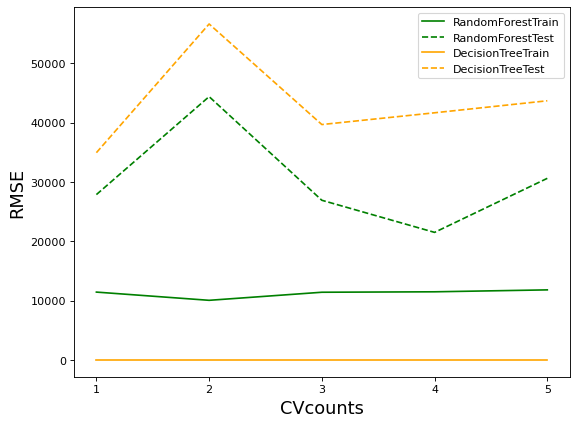

In [41]:
xaxis = range(1,6)
plt.figure(figsize=(8,6),dpi=80)
#RMSE
plt.plot(xaxis,trainRMSE_f,color="green",label = "RandomForestTrain")
plt.plot(xaxis,testRMSE_f,color="green",linestyle="--",label = "RandomForestTest")
plt.plot(xaxis,trainRMSE_t,color="orange",label = "DecisionTreeTrain")
plt.plot(xaxis,testRMSE_t,color="orange",linestyle="--",label = "DecisionTreeTest")
plt.xticks([1,2,3,4,5])
plt.xlabel("CVcounts",fontsize=16)
plt.ylabel("RMSE",fontsize=16)
plt.legend()
plt.show()